In [1]:
import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot as plt

import numpy as np
from pomegranate import *
import networkx as nx
from pomegranate.utils import plot_networkx
import time

## Dataset
- **TODO :** write about the dataset

In [3]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.dropna(inplace=True)
print(f"NaNs left : {df.isna().sum().sum()}")
print(f"Columns : {list(df.columns.values)}")

NaNs left : 0
Columns : ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


## Our aim
- **TODO :** write about our plans with the dataset

## What fields to keep and why
- **id :** This is not useful as the variable is just used as a identifier and has no real impact on a person having stroke.
- **gender :** text 
- **age :** 45 seems to be kinda threshold
- **hypertension :** 
- **heart_disease :** 
- **ever_married :** 
- **work_type :** 
- **Residence_type :** 
- **avg_glucose_level :** 100
- **bmi :** 21
- **smoking_status :** 
- **stroke :** Final prediction

In [6]:
df.drop(columns=["id"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## General dataset discovery and explanation

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

- Other is heavily underrepresented, so removing rows with gender as other.

In [10]:
df = df[df.gender != "Other"].reset_index(drop=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Dataset adaptation

- **TODO :** write explanation for the things done in next 2 cells

In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4904,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4905,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4906,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [13]:
#df["smoking_status"] = df["smoking_status"].factorize()[0]
df["gender"] = df["gender"].factorize()[0]
df["Residence_type"] = df["Residence_type"].factorize()[0]
df["ever_married"] = df["ever_married"].factorize()[0]
#df["work_type"] = df["work_type"].factorize()[0]

In [14]:
df["age"] = (df["age"] > 45).astype(int)
df.rename(columns={"age":"age_above_45"}, inplace=True)

df["avg_glucose_level"] = (df["avg_glucose_level"] > 100).astype(int)
df.rename(columns={"avg_glucose_level":"avg_glucose_level_above_100"}, inplace=True)

df["bmi"] = (df["bmi"] > 21).astype(int)
df.rename(columns={"bmi":"bmi_above_21"}, inplace=True)

In [15]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

## Removing unknown from smoking status

In [16]:
df = df[df['smoking_status'] != 'Unknown']
df.reset_index(drop=True, inplace=True)

In [17]:
df

,gender,age_above_45,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level_above_100,bmi_above_21,smoking_status,stroke
0,0,1,0,1,0,Private,0,1,1,formerly smoked,1
1,0,1,0,1,0,Private,1,1,1,never smoked,1
2,1,1,0,0,0,Private,0,1,1,smokes,1
3,1,1,1,0,0,Self-employed,1,1,1,never smoked,1
4,0,1,0,0,0,Private,0,1,1,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3420,0,1,1,0,0,Self-employed,1,0,1,never smoked,0
3421,1,1,0,0,0,Private,1,0,1,never smoked,0
3422,1,1,0,0,0,Self-employed,0,1,1,never smoked,0
3423,1,0,0,0,0,Self-employed,1,0,1,never smoked,0


## Change smoking to binary

In [18]:
binary_df = df.copy()
binary_df.head()

,gender,age_above_45,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level_above_100,bmi_above_21,smoking_status,stroke
0,0,1,0,1,0,Private,0,1,1,formerly smoked,1
1,0,1,0,1,0,Private,1,1,1,never smoked,1
2,1,1,0,0,0,Private,0,1,1,smokes,1
3,1,1,1,0,0,Self-employed,1,1,1,never smoked,1
4,0,1,0,0,0,Private,0,1,1,formerly smoked,1


In [19]:
binary_df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [20]:
binary_df["smoking_status"] = [1 if x in ["smokes", "formerly smoked"] else 0 for x in binary_df["smoking_status"]]

In [21]:
binary_df["Residence_type"] = binary_df["Residence_type"].factorize()[0]
binary_df["work_type"] = binary_df["work_type"].factorize()[0]

In [22]:
binary_df.head()

,gender,age_above_45,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level_above_100,bmi_above_21,smoking_status,stroke
0,0,1,0,1,0,0,0,1,1,1,1
1,0,1,0,1,0,0,1,1,1,0,1
2,1,1,0,0,0,0,0,1,1,1,1
3,1,1,1,0,0,1,1,1,1,0,1
4,0,1,0,0,0,0,0,1,1,1,1


## One hot encoding for work and smoking categories

In [23]:
encoded_df = pd.concat([df, pd.get_dummies(df["work_type"], prefix="work"), pd.get_dummies(df["smoking_status"], prefix="smoking")], axis=1)
encoded_df.head()

,gender,age_above_45,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level_above_100,bmi_above_21,smoking_status,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,0,1,0,1,0,Private,0,1,1,formerly smoked,1,0,0,1,0,0,1,0,0
1,0,1,0,1,0,Private,1,1,1,never smoked,1,0,0,1,0,0,0,1,0
2,1,1,0,0,0,Private,0,1,1,smokes,1,0,0,1,0,0,0,0,1
3,1,1,1,0,0,Self-employed,1,1,1,never smoked,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,Private,0,1,1,formerly smoked,1,0,0,1,0,0,1,0,0


In [24]:
encoded_df.drop(columns=["work_type", "smoking_status"], inplace=True)

In [25]:
encoded_df.head()

,gender,age_above_45,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level_above_100,bmi_above_21,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0
1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0
2,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1
3,1,1,1,0,0,1,1,1,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0


In [26]:
df.groupby(["gender", "age_above_45"]).sum()

hypertension  heart_disease  ever_married  \
gender age_above_45                                              
0      0                       21              1           251   
       1                      159            120            59   
1      0                       25              3           427   
       1                      203             82            89   

                     Residence_type  avg_glucose_level_above_100  \
gender age_above_45                                                
0      0                        269                          186   
       1                        399                          389   
1      0                        485                          311   
       1                        527                          481   

                     bmi_above_21  stroke  
gender age_above_45                        
0      0                      477       1  
       1                      809      74  
1      0                      885       7  
       1                     1057      98

- **TODO :** Explain the cell above (TLDR : Checking the relations rough way)

## Bayesian Network Learned from our dataset

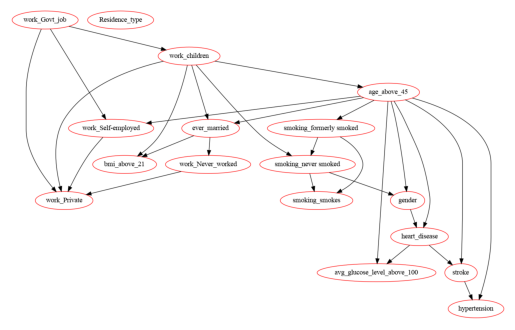

In [27]:
model = BayesianNetwork.from_samples(encoded_df.to_numpy(), state_names=encoded_df.columns.values, algorithm='exact')
model.plot()
plt.show()

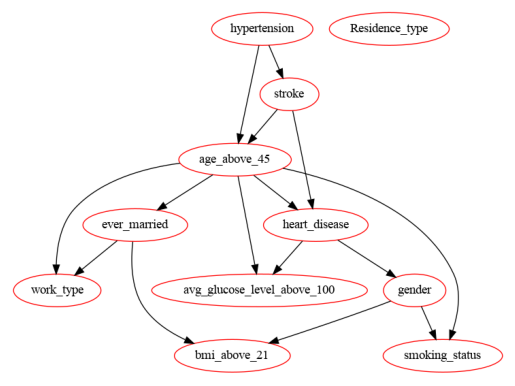

In [28]:
model = BayesianNetwork.from_samples(binary_df.to_numpy(), state_names=binary_df.columns.values, algorithm='exact')
model.plot()
plt.show()

- Not so good for our aim

## Bayesian Network with Constrain graph

In [36]:
encoded_df.columns.values

array(['gender', 'age_above_45', 'hypertension', 'heart_disease',
       'ever_married', 'Residence_type', 'avg_glucose_level_above_100',
       'bmi_above_21', 'stroke', 'work_Govt_job', 'work_Never_worked',
       'work_Private', 'work_Self-employed', 'work_children',
       'smoking_formerly smoked', 'smoking_never smoked',
       'smoking_smokes'], dtype=object)

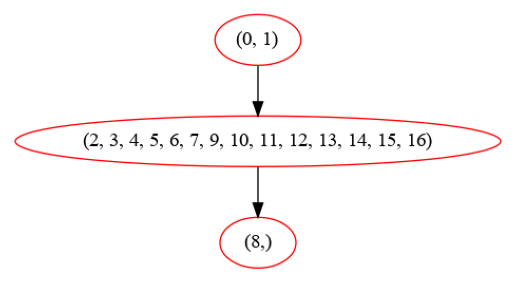

In [37]:
constrained_graph = nx.DiGraph()
layer_0 = tuple((0,1))
layer_1 = tuple((2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16))
layer_2 = tuple((8, ))

constrained_graph.add_edge(layer_0, layer_1)
constrained_graph.add_edge(layer_1, layer_2)
plot_networkx(constrained_graph)
plt.show()

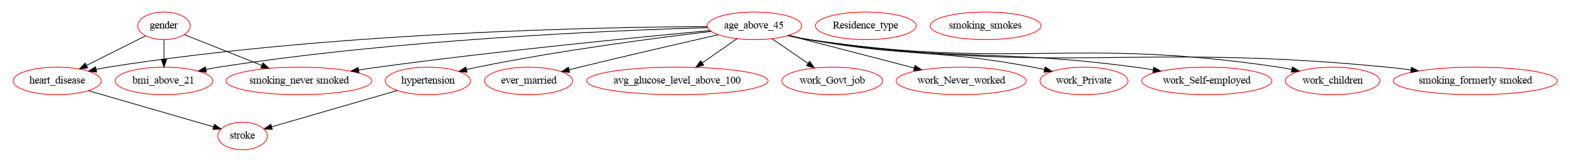

Time for learning 0.9506645202636719


In [38]:
tic = time.time()
model = BayesianNetwork.from_samples(encoded_df, algorithm='exact',  state_names=encoded_df.columns.values, constraint_graph=constrained_graph)

plt.figure(figsize=(20, 8))
model.plot()
plt.savefig("encoded_no_unkown.png")
plt.show()
print(f"Time for learning {time.time() - tic}")

In [39]:
binary_df.columns.values

array(['gender', 'age_above_45', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type',
       'avg_glucose_level_above_100', 'bmi_above_21', 'smoking_status',
       'stroke'], dtype=object)

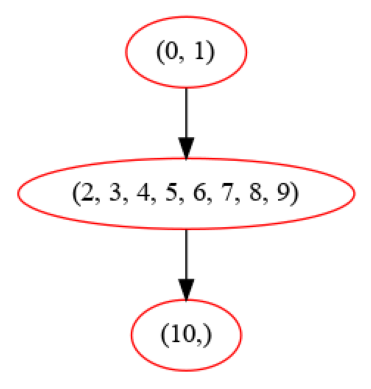

In [40]:
constrained_graph = nx.DiGraph()
layer_0 = tuple((0,1))
layer_1 = tuple((2, 3, 4, 5, 6, 7, 8, 9))
layer_2 = tuple((10, ))

constrained_graph.add_edge(layer_0, layer_1)
constrained_graph.add_edge(layer_1, layer_2)
plot_networkx(constrained_graph)
plt.show()

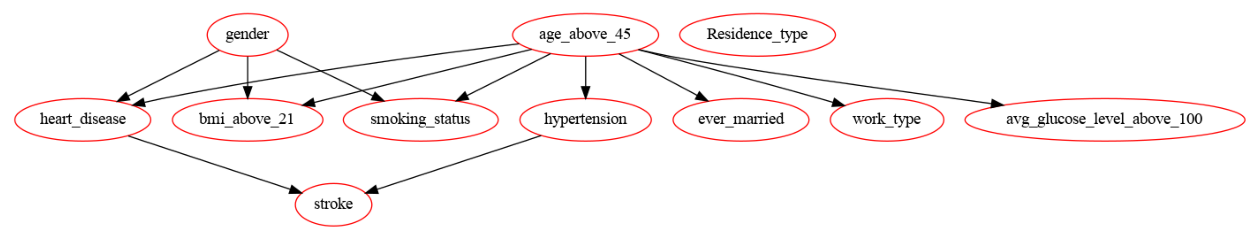

Time for learning 0.5763416290283203


In [41]:
tic = time.time()
model = BayesianNetwork.from_samples(binary_df, algorithm='exact',  state_names=binary_df.columns.values, constraint_graph=constrained_graph)

plt.figure(figsize=(16, 8))
model.plot()
plt.savefig("binary_no_unknown.png")
plt.show()
print(f"Time for learning {time.time() - tic}")

## Only keeping the nodes we feel are important to predict stroke

## Printing structures and Probability Distribution Tables

## Making predictions

## References
- https://reader.elsevier.com/reader/sd/pii/S2590093519300256?token=6BF0ECE1824F0323431707C3CBC2686CB9234CB0BA6FDAF43DD8BBA4F57F57907ECC9FB7F71F471115FB566955AF0C33&originRegion=eu-west-1&originCreation=20211225212607